Text(0.5, 0, '$y$')

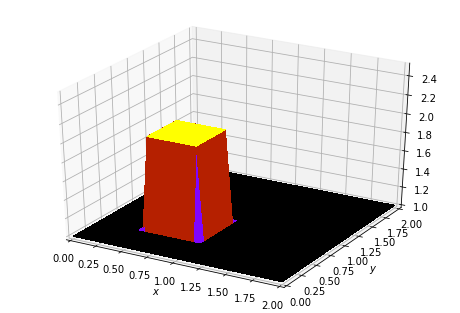

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#variables
nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

#initial conditions
u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
u[int(0.5 / dy):int(1 / dy), int(0.5 / dx):int(1 / dx)] = 2

#plot initial conditions
fig = pyplot.figure(figsize=(8,5.5))
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.gnuplot, linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [2]:
#Run nt time steps and plot
def diffuse(nt):
    u[int(0.5 / dy):int(1 / dy), int(0.5 / dx):int(1 / dx)] = 2
    
    for n in range(nt + 1):
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] +
                   nu * dt / dx**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1]) +
                   nu * dt / dy**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]))
        u[ 0, :] = 1
        u[-1, :] = 1
        u[ :, 0] = 1
        u[ :,-1] = 1
    
    fig = pyplot.figure(figsize=(11,7))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.gnuplot2,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

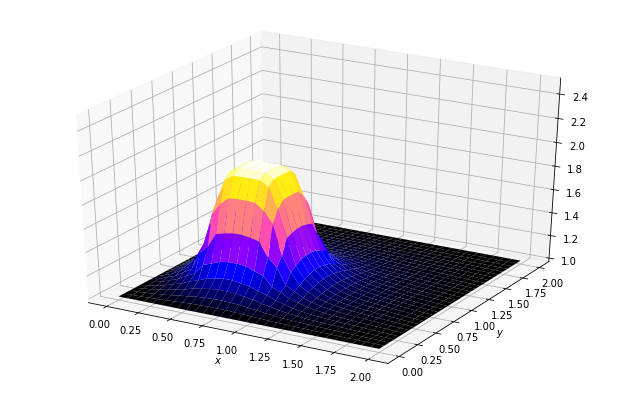

In [5]:
diffuse(1)